<a href="https://colab.research.google.com/github/ChelseaYYu/Binance/blob/master/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive/ColabNotebooks/BTCUSDT_trade_2024_04_12.json

BTCUSDT_trade_2024_04_12.json  kmeans.ipynb	  machine_translation.ipynb
Data_preprocessing.ipynb       kmeans_mine.ipynb  softmax.ipynb
Kmeans2.ipynb		       Llama.ipynb	  Untitled0.ipynb


In [7]:
import json

# Opening JSON file
# f = open('/content/drive/MyDrive/ColabNotebooks/BTCUSDT_trade_2024_04_12.json')



In [22]:
import json

with open('/content/drive/MyDrive/ColabNotebooks/BTCUSDT_trade_2024_04_12.json', 'r') as f:
    json_objects = []
    for i, line in enumerate(f):
        if i == 0:
            continue  # Skip the first line
        json_objects.append(json.loads(line.strip()))

In [39]:
# for obj in json_objects[:10]:
#     print(obj)

import pandas as pd

# df = pd.DataFrame(json_objects)


# df_sub = df[:100]


# Drop the 'e' column
df_cleaned = df.drop(columns=['e','s','M','E'])

# Convert 'E' column to timestamp
# df_cleaned['E'] = pd.to_datetime(df_cleaned['E'], unit='ms')
df_cleaned['trade_time'] = pd.to_datetime(df_cleaned['T'], unit='ms')


df_cleaned = df_cleaned.rename(columns={
    't': 'trade_id',
    'p': 'price',
    'q': 'quantity',
    'b': 'buyer_order_id',
    'a': 'seller_order_id',
    'm': 'is_market_maker'
})




float64


<Axes: title={'center': 'Average Price per timestamp'}, xlabel='trade_time'>

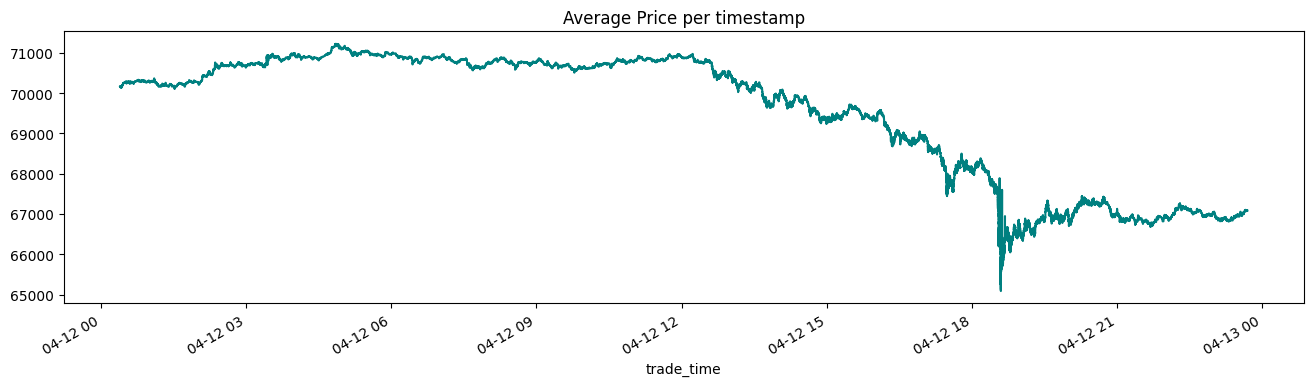

In [41]:
# Check the data type of the 'price' column
print(df_cleaned['price'].dtype)

# # Convert the 'price' column to numeric, forcing errors to NaN
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')

# # Drop rows with NaN values in the 'price' column
df_cleaned = df_cleaned.dropna(subset=['price'])


# Set the 'timestamp' column as the index
df_cleaned.set_index('trade_time', inplace=True)

# Plot the 'price' column with the 'timestamp' index
df_cleaned['price'].plot(color='teal', figsize=(16, 4), title="Average Price per timestamp")


object


<Axes: title={'center': 'Volume per timestamp'}, xlabel='trade_time'>

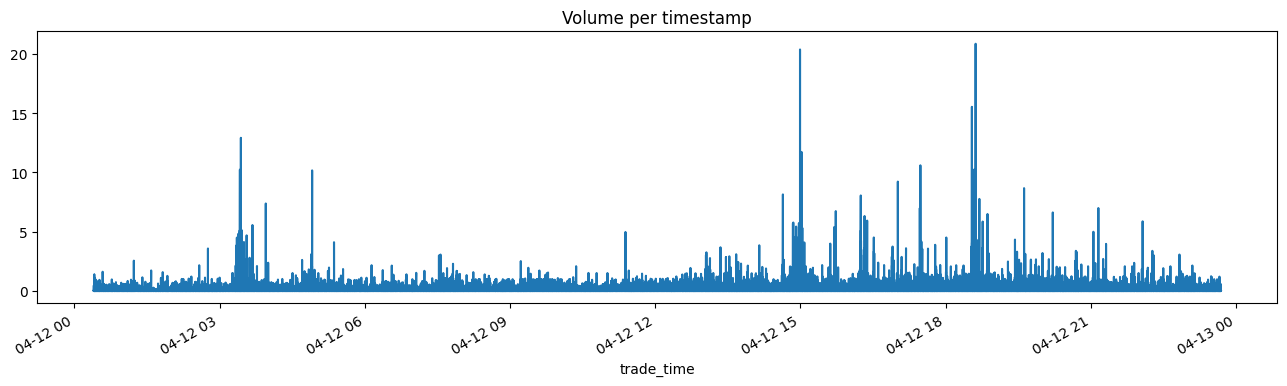

In [46]:
#total trade volume per timestamp
print(df_cleaned['quantity'].dtype)

df_cleaned['quantity'] = pd.to_numeric(df_cleaned['quantity'], errors='coerce')
df_cleaned['quantity'].plot(kind='line', figsize=(16,4), title="Volume per timestamp")

<ipython-input-60-c8e540e316ac>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned.quantity)
<ipython-input-60-c8e540e316ac>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned.price)


<Axes: title={'center': 'Trade Price Distribution'}, xlabel='price', ylabel='Density'>

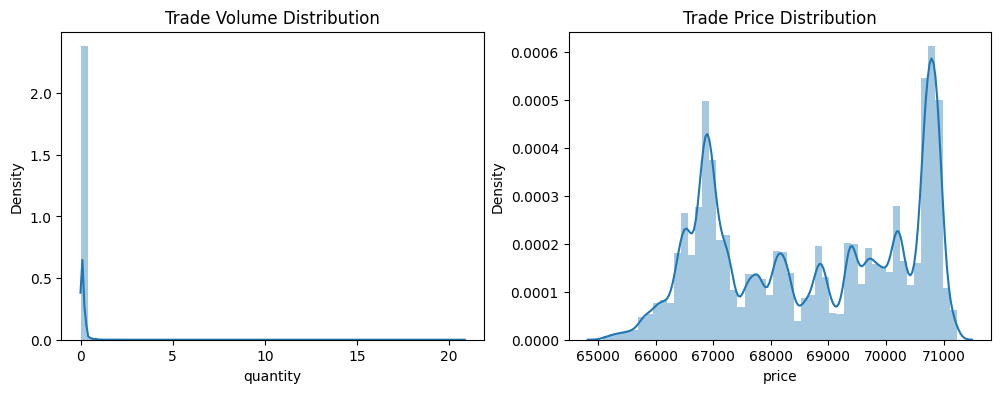

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Trade Volume Distribution')
sns.distplot(df_cleaned.quantity)
plt.subplot(122)
plt.title('Trade Price Distribution')
sns.distplot(df_cleaned.price)

In [62]:
transaction_counts = df_cleaned.resample('6T').size()

# Get the highest number of transactions in any 6-minute period
max_transactions = transaction_counts.max()
min_transactions = transaction_counts.min()

print("Highest number of transactions in 6 mins: ", max_transactions)

print("Highest number of transactions in 6 mins: ", min_transactions)

Highest number of transactions in 6 mins:  142133
Highest number of transactions in 6 mins:  5
